In [25]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import datetime
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [26]:
# File to Load (Remember to Change These) via Jupyter Notebook
file_to_load_11 = "/Users/theluggage/Desktop/DataAnalyticsBootcampHomework/Project 4/sv8sv9_merged_all.csv"

# Read File and store into Pandas data frame via Jupter Notebook
sv8sv9_analysis = pd.read_csv(file_to_load_11, infer_datetime_format=True)

# # File to Load via Google Colab
# file_to_load_12 = "/content/drive/MyDrive/CSVs/sv8sv9_merged_all.csv"


# # Read File and store into Pandas data frame via Google Colab
# sv8sv9_analysis = pd.read_csv(file_to_load_12, infer_datetime_format=True)

In [27]:
#Drop columns
sv8sv9_analysis = sv8sv9_analysis.drop(['Unnamed: 0', 'Cost%'], axis=1)
sv8sv9_analysis

,Order ID,Order Date,Ship Date,Order Quantity,Unit Price,Discount,Sales,Profit,Product Category,Product Sub-Category,...,Customer Name,Country,Region,Province (CA),City (US),State (US),Postal Code (US),Returned,GM%,Cost
0,3,10/13/10,10/20/10,6,38.94,0.04,261.5400,-213.2500,Office Supplies,Storage & Organization,...,Muhammed MacIntyre,Canada,CA-Nunavut,Nunavut,N,N,0,0,-0.815363,474.7900
1,293,10/1/12,10/2/12,49,208.16,0.07,10123.0200,457.8100,Office Supplies,Appliances,...,Barry French,Canada,CA-Nunavut,Nunavut,N,N,0,0,0.045225,9665.2100
2,293,10/1/12,10/3/12,27,8.69,0.01,244.5700,46.7100,Office Supplies,Binders and Binder Accessories,...,Barry French,Canada,CA-Nunavut,Nunavut,N,N,0,0,0.190988,197.8600
3,483,7/10/11,7/12/11,30,195.99,0.08,4965.7595,1198.9700,Technology,Telephones and Communication,...,Clay Rozendal,Canada,CA-Nunavut,Nunavut,N,N,0,0,0.241447,3766.7895
4,515,8/28/10,8/30/10,19,21.78,0.08,394.2700,30.9400,Office Supplies,Appliances,...,Carlos Soltero,Canada,CA-Nunavut,Nunavut,N,N,0,0,0.078474,363.3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18388,CA-2011-110422,1/22/11,1/24/11,3,10.52,0.20,25.2480,4.1028,Furniture,Furnishings,...,Tom Boeckenhauer,United States,US-South,N,Miami,Florida,33180,0,0.162500,21.1452
18389,CA-2014-121258,2/27/14,3/4/14,2,45.98,0.00,91.9600,15.6332,Furniture,Furnishings,...,Dave Brooks,United States,US-West,N,Costa Mesa,California,92627,1,0.170000,76.3268
18390,CA-2014-121258,2/27/14,3/4/14,2,161.61,0.20,258.5760,19.3932,Technology,Phones,...,Dave Brooks,United States,US-West,N,Costa Mesa,California,92627,1,0.075000,239.1828
18391,CA-2014-121258,2/27/14,3/4/14,4,7.40,0.00,29.6000,13.3200,Office Supplies,Paper,...,Dave Brooks,United States,US-West,N,Costa Mesa,California,92627,1,0.450000,16.2800


In [28]:
#Get Order Dates

sv8sv9_analysis['Order Date'] = pd.to_datetime(sv8sv9_analysis['Order Date'], errors='coerce')

# #Change the data in thr YEAR_ column to a float.
# sv8sv9_analysis["Order Date"] = sv8sv9_analysis["Order Date"].apply(pd.to_numeric, downcast='float', errors='coerce')

sv8sv9_analysis['Order_YMD'] = pd.to_datetime(sv8sv9_analysis['Order Date'], infer_datetime_format=True, utc=None)
pd.to_datetime(sv8sv9_analysis['Order Date'], format="%m/%d/%y", utc=None)

sv8sv9_analysis['Order Day'] = sv8sv9_analysis['Order Date'].dt.day
sv8sv9_analysis['Order Month'] = sv8sv9_analysis['Order Date'].dt.month
sv8sv9_analysis['Order Year'] = sv8sv9_analysis['Order Date'].dt.year

In [29]:
sv8sv9_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order ID              18393 non-null  object        
 1   Order Date            18393 non-null  datetime64[ns]
 2   Ship Date             18393 non-null  object        
 3   Order Quantity        18393 non-null  int64         
 4   Unit Price            18393 non-null  float64       
 5   Discount              18393 non-null  float64       
 6   Sales                 18393 non-null  float64       
 7   Profit                18393 non-null  float64       
 8   Product Category      18393 non-null  object        
 9   Product Sub-Category  18393 non-null  object        
 10  Product Name          18393 non-null  object        
 11  Customer Segment      18393 non-null  object        
 12  Customer Name         18393 non-null  object        
 13  Country         

In [30]:
#Customers

In [31]:
#Sales by Country

#Do a GroupBy for Average Returns with 0 = Not Returned and 1 = Returned
sv8sv9_analysis_sales_sum = sv8sv9_analysis.groupby('Order Month').count()
sv8sv9_analysis_sales_sum = sv8sv9_analysis_sales_sum[['Sales']]
sv8sv9_analysis_sales_sum

,Sales
Order Month,
1,1103
2,953
3,1377
4,1335
5,1528
6,1358
7,1407
8,1415
9,2121


NameError: name 'ylabel' is not defined

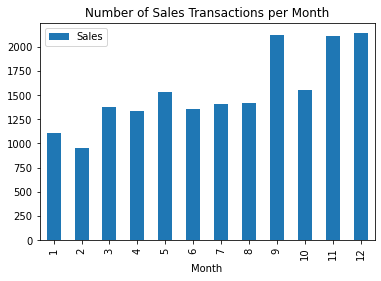

In [37]:
#create a bar graph for sales per month.

sv8sv9_analysis_sales_sum.reset_index().plot(
x="Order Month", y=["Sales"], kind="bar"
)
plt.title("Number of Sales Transactions per Month")
plt.xlabel("Month")
plt.ylabel("Number of Sales Transactions")

In [33]:
#Do a GroupBy for Average Returns with 0 = Not Returned and 1 = Returned
sv8sv9_analysis_sales_sum = sv8sv9_analysis.groupby('Order Month').count()
sv8sv9_analysis_sales_sum = sv8sv9_analysis_sales_sum[['Sales']]
sv8sv9_analysis_sales_sum

,Sales
Order Month,
1,1103
2,953
3,1377
4,1335
5,1528
6,1358
7,1407
8,1415
9,2121


In [36]:
#Do a GroupBy for Average Returns with 0 = Not Returned and 1 = Returned
sv8sv9_analysis_names_count = sv8sv9_analysis.groupby('Customer Name').count()
sv8sv9_analysis_names_count = sv8sv9_analysis_names_count[['Sales']]
sv8sv9_analysis_names_count.sort_values(by='Sales', ascending=False)['Sales'].head(50)

Customer Name
William Brown       60
Carlos Soltero      55
Darren Budd         55
Jonathan Doherty    54
Matt Abelman        52
John Lee            52
Lena Creighton      51
Ed Braxton          50
Sally Hughsby       50
Adam Hart           47
Noel Staavos        47
Keith Dawkins       46
Joy Smith           46
Paul Prost          45
Greg Guthrie        45
Rick Wilson         45
Maria Bertelson     44
Dave Hallsten       44
Seth Vernon         44
Arthur Prichep      44
Bill Donatelli      44
Ken Lonsdale        43
Muhammed Yedwab     43
Dennis Kane         43
Tony Sayre          43
Clytie Kelty        43
Patrick Jones       43
Cynthia Arntzen     42
Helen Wasserman     42
Jack O'Briant       41
Brian Moss          41
Emily Phan          41
Sylvia Foulston     41
Natalie Webber      40
Alan Hwang          40
Damala Kotsonis     40
Denise Monton       40
Edward Hooks        39
Dan Campbell        39
Joseph Airdo        39
Steve Nguyen        39
Mick Crebagga       39
Peter Fuller        

In [39]:
sv8sv9_analysis['Customer Name'].value_counts()

William Brown       60
Darren Budd         55
Carlos Soltero      55
Jonathan Doherty    54
John Lee            52
                    ..
Barry French         4
Ralph Ritter         4
Bruce Money          3
Craig Rider          2
Maureen Grace        1
Name: Customer Name, Length: 834, dtype: int64

In [75]:
# File to Load (Remember to Change These) via Jupyter Notebook
file_to_load_13 = "/Users/theluggage/Desktop/DataAnalyticsBootcampHomework/Project 4/sv8sv9_merged_all.csv"

# Read File and store into Pandas data frame via Jupter Notebook
sv8sv9_heatmap = pd.read_csv(file_to_load_13, infer_datetime_format=True)

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
sv8sv9_heatmap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            18393 non-null  int64  
 1   Order ID              18393 non-null  object 
 2   Order Date            18393 non-null  object 
 3   Ship Date             18393 non-null  object 
 4   Order Quantity        18393 non-null  int64  
 5   Unit Price            18393 non-null  float64
 6   Discount              18393 non-null  float64
 7   Sales                 18393 non-null  float64
 8   Profit                18393 non-null  float64
 9   Product Category      18393 non-null  object 
 10  Product Sub-Category  18393 non-null  object 
 11  Product Name          18393 non-null  object 
 12  Customer Segment      18393 non-null  object 
 13  Customer Name         18393 non-null  object 
 14  Country               18393 non-null  object 
 15  Region             

In [78]:
#Drop columns
sv8sv9_heatmap_dropped = sv8sv9_heatmap.drop(['Unnamed: 0', 'Postal Code (US)', 'Cost%', 'Order ID', 'Ship Date'], axis=1)
sv8sv9_heatmap_dropped

,Order Date,Order Quantity,Unit Price,Discount,Sales,Profit,Product Category,Product Sub-Category,Product Name,Customer Segment,Customer Name,Country,Region,Province (CA),City (US),State (US),Returned,GM%,Cost
0,10/13/10,6,38.94,0.04,261.5400,-213.2500,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Small Business,Muhammed MacIntyre,Canada,CA-Nunavut,Nunavut,N,N,0,-0.815363,474.7900
1,10/1/12,49,208.16,0.07,10123.0200,457.8100,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Consumer,Barry French,Canada,CA-Nunavut,Nunavut,N,N,0,0.045225,9665.2100
2,10/1/12,27,8.69,0.01,244.5700,46.7100,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Consumer,Barry French,Canada,CA-Nunavut,Nunavut,N,N,0,0.190988,197.8600
3,7/10/11,30,195.99,0.08,4965.7595,1198.9700,Technology,Telephones and Communication,R380,Corporate,Clay Rozendal,Canada,CA-Nunavut,Nunavut,N,N,0,0.241447,3766.7895
4,8/28/10,19,21.78,0.08,394.2700,30.9400,Office Supplies,Appliances,Holmes HEPA Air Purifier,Consumer,Carlos Soltero,Canada,CA-Nunavut,Nunavut,N,N,0,0.078474,363.3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18388,1/22/11,3,10.52,0.20,25.2480,4.1028,Furniture,Furnishings,Ultra Door Pull Handle,Consumer,Tom Boeckenhauer,United States,US-South,N,Miami,Florida,0,0.162500,21.1452
18389,2/27/14,2,45.98,0.00,91.9600,15.6332,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,Consumer,Dave Brooks,United States,US-West,N,Costa Mesa,California,1,0.170000,76.3268
18390,2/27/14,2,161.61,0.20,258.5760,19.3932,Technology,Phones,Aastra 57i VoIP phone,Consumer,Dave Brooks,United States,US-West,N,Costa Mesa,California,1,0.075000,239.1828
18391,2/27/14,4,7.40,0.00,29.6000,13.3200,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",Consumer,Dave Brooks,United States,US-West,N,Costa Mesa,California,1,0.450000,16.2800


In [111]:
# File to Load (Remember to Change These) via Jupyter Notebook
file_to_load_13 = "/Users/theluggage/Desktop/DataAnalyticsBootcampHomework/Project 4/sv8sv9_merged_all.csv"

# Read File and store into Pandas data frame via Jupter Notebook
sv8sv9_heatmap = pd.read_csv(file_to_load_13, infer_datetime_format=True)

In [112]:
#Drop columns
sv8sv9_heatmap_dropped = sv8sv9_heatmap.drop(['Unnamed: 0', 'Returned', 'Postal Code (US)', 'Cost%', 'Order ID', 'Ship Date'], axis=1)
sv8sv9_heatmap_dropped

,Order Date,Order Quantity,Unit Price,Discount,Sales,Profit,Product Category,Product Sub-Category,Product Name,Customer Segment,Customer Name,Country,Region,Province (CA),City (US),State (US),GM%,Cost
0,10/13/10,6,38.94,0.04,261.5400,-213.2500,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Small Business,Muhammed MacIntyre,Canada,CA-Nunavut,Nunavut,N,N,-0.815363,474.7900
1,10/1/12,49,208.16,0.07,10123.0200,457.8100,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Consumer,Barry French,Canada,CA-Nunavut,Nunavut,N,N,0.045225,9665.2100
2,10/1/12,27,8.69,0.01,244.5700,46.7100,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Consumer,Barry French,Canada,CA-Nunavut,Nunavut,N,N,0.190988,197.8600
3,7/10/11,30,195.99,0.08,4965.7595,1198.9700,Technology,Telephones and Communication,R380,Corporate,Clay Rozendal,Canada,CA-Nunavut,Nunavut,N,N,0.241447,3766.7895
4,8/28/10,19,21.78,0.08,394.2700,30.9400,Office Supplies,Appliances,Holmes HEPA Air Purifier,Consumer,Carlos Soltero,Canada,CA-Nunavut,Nunavut,N,N,0.078474,363.3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18388,1/22/11,3,10.52,0.20,25.2480,4.1028,Furniture,Furnishings,Ultra Door Pull Handle,Consumer,Tom Boeckenhauer,United States,US-South,N,Miami,Florida,0.162500,21.1452
18389,2/27/14,2,45.98,0.00,91.9600,15.6332,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,Consumer,Dave Brooks,United States,US-West,N,Costa Mesa,California,0.170000,76.3268
18390,2/27/14,2,161.61,0.20,258.5760,19.3932,Technology,Phones,Aastra 57i VoIP phone,Consumer,Dave Brooks,United States,US-West,N,Costa Mesa,California,0.075000,239.1828
18391,2/27/14,4,7.40,0.00,29.6000,13.3200,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",Consumer,Dave Brooks,United States,US-West,N,Costa Mesa,California,0.450000,16.2800


In [113]:
#Create Correlation Matrix.
sv8sv9_heatmap_corr = sv8sv9_heatmap_dropped.corr()

[Text(0.5, 1.0, 'Superstore Correlation Heatmap')]

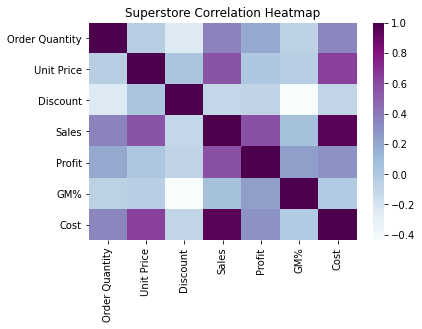

In [114]:
#Create Correlation Heatmap
sns.heatmap(sv8sv9_heatmap_corr, cmap="BuPu").set(title='Superstore Correlation Heatmap')

In [88]:
sv8sv9_heatmap_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            18393 non-null  int64  
 1   Order ID              18393 non-null  object 
 2   Order Date            18393 non-null  object 
 3   Ship Date             18393 non-null  object 
 4   Order Quantity        18393 non-null  int64  
 5   Unit Price            18393 non-null  float64
 6   Discount              18393 non-null  float64
 7   Sales                 18393 non-null  float64
 8   Profit                18393 non-null  float64
 9   Product Category      18393 non-null  object 
 10  Product Sub-Category  18393 non-null  object 
 11  Product Name          18393 non-null  object 
 12  Customer Segment      18393 non-null  object 
 13  Customer Name         18393 non-null  object 
 14  Country               18393 non-null  object 
 15  Region             

In [89]:
#Drop columns
sv8sv9_heatmap_dropped = sv8sv9_heatmap.drop(['Unnamed: 0', 'Postal Code (US)', 'Cost%', 'Order ID', 'Ship Date'], axis=1)
sv8sv9_heatmap_dropped

,Order Date,Order Quantity,Unit Price,Discount,Sales,Profit,Product Category,Product Sub-Category,Product Name,Customer Segment,Customer Name,Country,Region,Province (CA),City (US),State (US),Returned,GM%,Cost
0,10/13/10,6,38.94,0.04,261.5400,-213.2500,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Small Business,Muhammed MacIntyre,Canada,CA-Nunavut,Nunavut,N,N,0,-0.815363,474.7900
1,10/1/12,49,208.16,0.07,10123.0200,457.8100,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Consumer,Barry French,Canada,CA-Nunavut,Nunavut,N,N,0,0.045225,9665.2100
2,10/1/12,27,8.69,0.01,244.5700,46.7100,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Consumer,Barry French,Canada,CA-Nunavut,Nunavut,N,N,0,0.190988,197.8600
3,7/10/11,30,195.99,0.08,4965.7595,1198.9700,Technology,Telephones and Communication,R380,Corporate,Clay Rozendal,Canada,CA-Nunavut,Nunavut,N,N,0,0.241447,3766.7895
4,8/28/10,19,21.78,0.08,394.2700,30.9400,Office Supplies,Appliances,Holmes HEPA Air Purifier,Consumer,Carlos Soltero,Canada,CA-Nunavut,Nunavut,N,N,0,0.078474,363.3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18388,1/22/11,3,10.52,0.20,25.2480,4.1028,Furniture,Furnishings,Ultra Door Pull Handle,Consumer,Tom Boeckenhauer,United States,US-South,N,Miami,Florida,0,0.162500,21.1452
18389,2/27/14,2,45.98,0.00,91.9600,15.6332,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,Consumer,Dave Brooks,United States,US-West,N,Costa Mesa,California,1,0.170000,76.3268
18390,2/27/14,2,161.61,0.20,258.5760,19.3932,Technology,Phones,Aastra 57i VoIP phone,Consumer,Dave Brooks,United States,US-West,N,Costa Mesa,California,1,0.075000,239.1828
18391,2/27/14,4,7.40,0.00,29.6000,13.3200,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",Consumer,Dave Brooks,United States,US-West,N,Costa Mesa,California,1,0.450000,16.2800


In [91]:
# File to Load (Remember to Change These) via Jupyter Notebook
file_to_load_14 = "../Project_4_data_2_ca.csv"
file_to_load_15 = "../Project_4_data_2_us.csv"

# Read File and store into Pandas data frame via Jupter Notebook
sv8sv9_heatmap_ca = pd.read_csv(file_to_load_14, infer_datetime_format=True)
sv8sv9_heatmap_us = pd.read_csv(file_to_load_15, infer_datetime_format=True)

In [98]:
sv8sv9_heatmap_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8399 non-null   int64  
 1   Line_ct               8399 non-null   int64  
 2   Order ID              8399 non-null   int64  
 3   Order Date            8399 non-null   object 
 4   Ship Date             8399 non-null   object 
 5   Order Quantity        8399 non-null   int64  
 6   Unit Price            8399 non-null   float64
 7   Discount              8399 non-null   float64
 8   Sales                 8399 non-null   float64
 9   Profit                8399 non-null   float64
 10  Cost                  8399 non-null   float64
 11  GM%                   8399 non-null   float64
 12  Product Category      8399 non-null   object 
 13  Product Sub-Category  8399 non-null   object 
 14  Product Name          8399 non-null   object 
 15  Customer Segment     

In [103]:
#Drop columns
sv8sv9_heatmap_ca_dropped = sv8sv9_heatmap_ca.drop(['Unnamed: 0', 'Line_ct', 'Order ID', 'Ship Date', 'Region', 'Returned', 'Order_YMD', 'Order Day', 'Order Month', 'Order Year'], axis=1)
sv8sv9_heatmap_ca_dropped

,Order Date,Order Quantity,Unit Price,Discount,Sales,Profit,Cost,GM%,Product Category,Product Sub-Category,Product Name,Customer Segment,Customer Name,Country,Province (CA)
0,2010-10-13,6,38.94,0.04,261.5400,-213.25,474.7900,-0.815363,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Small Business,Muhammed MacIntyre,Canada,Nunavut
1,2012-10-01,49,208.16,0.07,10123.0200,457.81,9665.2100,0.045225,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Consumer,Barry French,Canada,Nunavut
2,2012-10-01,27,8.69,0.01,244.5700,46.71,197.8600,0.190988,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-DÂ® Ring Binder, Heavy Gauge Vinyl",Consumer,Barry French,Canada,Nunavut
3,2011-07-10,30,195.99,0.08,4965.7595,1198.97,3766.7895,0.241447,Technology,Telephones and Communication,R380,Corporate,Clay Rozendal,Canada,Nunavut
4,2010-08-28,19,21.78,0.08,394.2700,30.94,363.3300,0.078474,Office Supplies,Appliances,Holmes HEPA Air Purifier,Consumer,Carlos Soltero,Canada,Nunavut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,2010-08-09,8,150.98,0.05,1294.0400,-323.18,1617.2200,-0.249745,Furniture,Bookcases,Bush Mission Pointe Library,Consumer,Mick Brown,Canada,Alberta
8395,2010-08-09,23,17.07,0.04,392.5700,22.25,370.3200,0.056678,Office Supplies,Envelopes,Recycled Interoffice Envelopes with Re-Use-A-S...,Consumer,Mick Brown,Canada,Alberta
8396,2011-04-08,37,22.23,0.03,823.7800,343.05,480.7300,0.416434,Furniture,Office Furnishings,"Executive Impressions 14""",Home Office,Frank Hawley,Canada,Alberta
8397,2011-04-08,8,65.99,0.00,469.8375,-159.24,629.0775,-0.338926,Technology,Telephones and Communication,Talkabout T8367,Home Office,Frank Hawley,Canada,Alberta


In [104]:
#Create Correlation Matrix.
sv8sv9_heatmap_corr_ca = sv8sv9_heatmap_ca_dropped.corr()

[Text(0.5, 1.0, 'Superstore Correlation Heatmap (Canada)')]

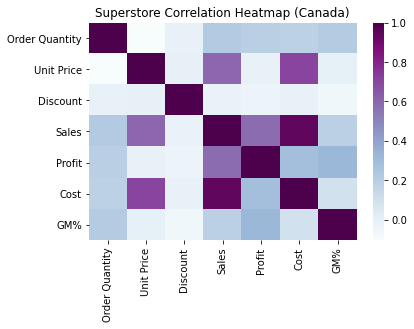

In [110]:
#Create Correlation Heatmap
sns.heatmap(sv8sv9_heatmap_corr_ca, cmap="BuPu").set(title='Superstore Correlation Heatmap (Canada)')

In [106]:
sv8sv9_heatmap_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            9994 non-null   int64  
 1   Line_ct               9994 non-null   int64  
 2   Order ID              9994 non-null   object 
 3   Order Date            9994 non-null   object 
 4   Ship Date             9994 non-null   object 
 5   Order Quantity        9994 non-null   int64  
 6   Unit Price            9994 non-null   float64
 7   Discount              9994 non-null   float64
 8   Sales                 9994 non-null   float64
 9   Profit                9994 non-null   float64
 10  Cost                  9994 non-null   float64
 11  GM%                   9994 non-null   float64
 12  Product Category      9994 non-null   object 
 13  Product Sub-Category  9994 non-null   object 
 14  Product Name          9994 non-null   object 
 15  Customer Segment     

In [120]:
#Drop columns
sv8sv9_heatmap_us_dropped = sv8sv9_heatmap_us.drop(['Unnamed: 0', 'Line_ct', 'Order ID', 'Ship Date', 'Region', 'Returned', 'Order_YMD', 'Order Day', 'Order Month', 'Order Year', 'Postal Code (US)'], axis=1)
sv8sv9_heatmap_us_dropped

,Order Date,Order Quantity,Unit Price,Discount,Sales,Profit,Cost,GM%,Product Category,Product Sub-Category,Product Name,Customer Segment,Customer Name,Country,City (US),State (US)
0,2013-11-09,2,130.98,0.00,261.9600,41.9136,220.0464,0.1600,Furniture,Bookcases,Bush Somerset Collection Bookcase,Consumer,Claire Gute,United States,Henderson,Kentucky
1,2013-11-09,3,243.98,0.00,731.9400,219.5820,512.3580,0.3000,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Consumer,Claire Gute,United States,Henderson,Kentucky
2,2013-06-13,2,7.31,0.00,14.6200,6.8714,7.7486,0.4700,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,Corporate,Darrin Van Huff,United States,Los Angeles,California
3,2012-10-11,5,348.21,0.45,957.5775,-383.0310,1340.6085,-0.4000,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,Consumer,Sean O'Donnell,United States,Fort Lauderdale,Florida
4,2012-10-11,2,13.98,0.20,22.3680,2.5164,19.8516,0.1125,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,Consumer,Sean O'Donnell,United States,Fort Lauderdale,Florida
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2011-01-22,3,10.52,0.20,25.2480,4.1028,21.1452,0.1625,Furniture,Furnishings,Ultra Door Pull Handle,Consumer,Tom Boeckenhauer,United States,Miami,Florida
9990,2014-02-27,2,45.98,0.00,91.9600,15.6332,76.3268,0.1700,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,Consumer,Dave Brooks,United States,Costa Mesa,California
9991,2014-02-27,2,161.61,0.20,258.5760,19.3932,239.1828,0.0750,Technology,Phones,Aastra 57i VoIP phone,Consumer,Dave Brooks,United States,Costa Mesa,California
9992,2014-02-27,4,7.40,0.00,29.6000,13.3200,16.2800,0.4500,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",Consumer,Dave Brooks,United States,Costa Mesa,California


In [121]:
#Create Correlation Matrix.
sv8sv9_heatmap_corr_us = sv8sv9_heatmap_us_dropped.corr()

[Text(0.5, 1.0, 'Superstore Correlation Heatmap (United States)')]

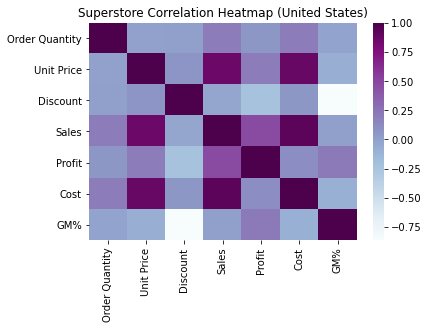

In [122]:
#Create Correlation Heatmap
sns.heatmap(sv8sv9_heatmap_corr_us, cmap="BuPu").set(title='Superstore Correlation Heatmap (United States)')